# Import Libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud ,STOPWORDS
from collections import Counter

# Data Loading

In [108]:
train = pd.read_csv("G:/Jigsaw-toxic-comment-classification/train.csv") 
test = pd.read_csv("G:/Jigsaw-toxic-comment-classification/test.csv")
test_y = pd.read_csv("G:/Jigsaw-toxic-comment-classification/test_labels.csv")

In [109]:
print('train shape:',train.shape)
train.head(10)

train shape: (159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


* There seems to be comments that doesn't have any tags. They may be clean comments
* we can see that the 6th message belongs to 4 classes

In [110]:
print('test shape:',test.shape)
test.head()

test shape: (153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [111]:
test_y.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


# Exploratory data analysis

Since there are many comments that are not labelled in any of the six categories, lets mark it as "clean"

In [112]:
# marking comments without any tags as "clean"
tag_sums = train.iloc[:,2:].sum(axis=1)
train['clean'] = (tag_sums==0)

In [113]:
print("Check for missing values in Train dataset")
null_train = train.isnull().sum()
print(null_train)
print("Check for missing values in Train dataset")
null_test = test.isnull().sum()
print(null_test)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
Check for missing values in Train dataset
id              0
comment_text    0
dtype: int64


Ok, No null values

Now lets see some of the comments...

In [114]:
# example of clean comment
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [115]:
# example of toxic comment
train[train.toxic == 1].iloc[1, 1]

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

In [116]:
# example of identity_hate comment
train[train.identity_hate == 1].iloc[1, 1]

'A pair of jew-hating weiner nazi schmucks.'

In [117]:
# just a random comment
train['comment_text'][157718]

"bitch \nyou are a fucking hore. you suck dick you big ass hole. you are gay you faggot ass bitch. you can go to hell you bitch ass motherfucker, suck a big dick asshole. i'm fuckin your mom ho. she can't get off my dick. your daddy probably raped you in the ass everyday when you were young you stupid ass motherfuck."

Yuck, so much hate

## Class Distribution

In [118]:
label_count = train[train.columns[2:]].sum()
label_count

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
clean            143346
dtype: int64

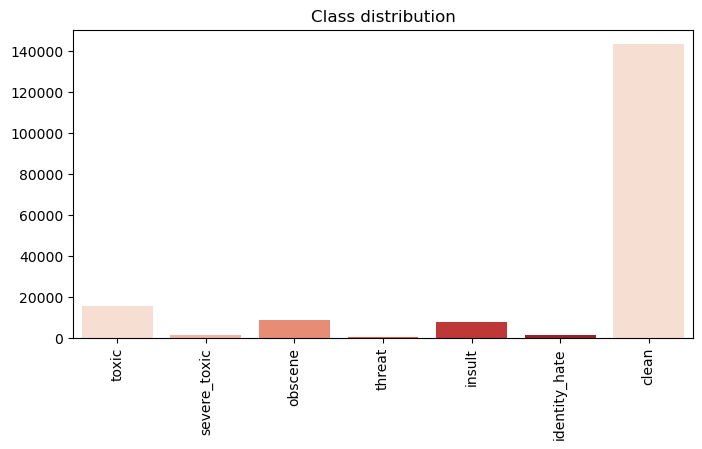

In [157]:
plt.figure(figsize=(8,4))
sns.barplot(x= label_count.index, y = label_count.values, palette= sns.color_palette("Reds"))
plt.xticks(rotation=90)
plt.title('Class distribution', fontsize=12)
plt.show()

Clearly there is class imbalance. We can see that **clean** has the most observations while **threat** has least observations. Also there are comments that belong to multiple classes. 

## Length Distribution

Text(0.5, 1.0, 'Distribution of comment Lengths')

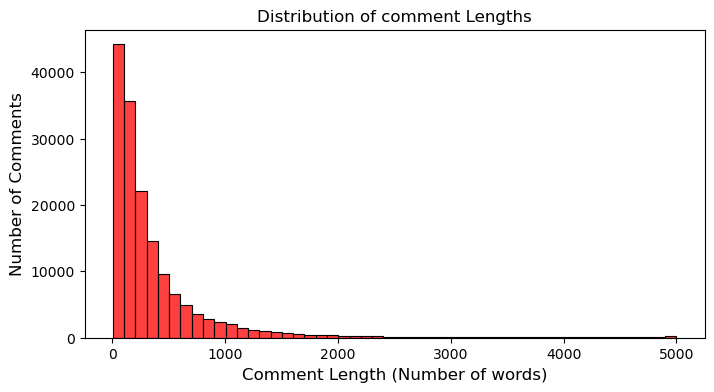

In [156]:
comment_len = train.comment_text.str.len()

# plot the distribution of comment lengths
plt.figure(figsize=(8,4))
sns.histplot(comment_len, kde=False, bins=50, color="red")
plt.xlabel("Comment Length (Number of words)", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.title("Distribution of comment Lengths", fontsize=12)

Most of the comments fall between the range of 0-500. We have few comments that go beyond 500 words. 

Let's see the distribution of the comment lengths by each labels.

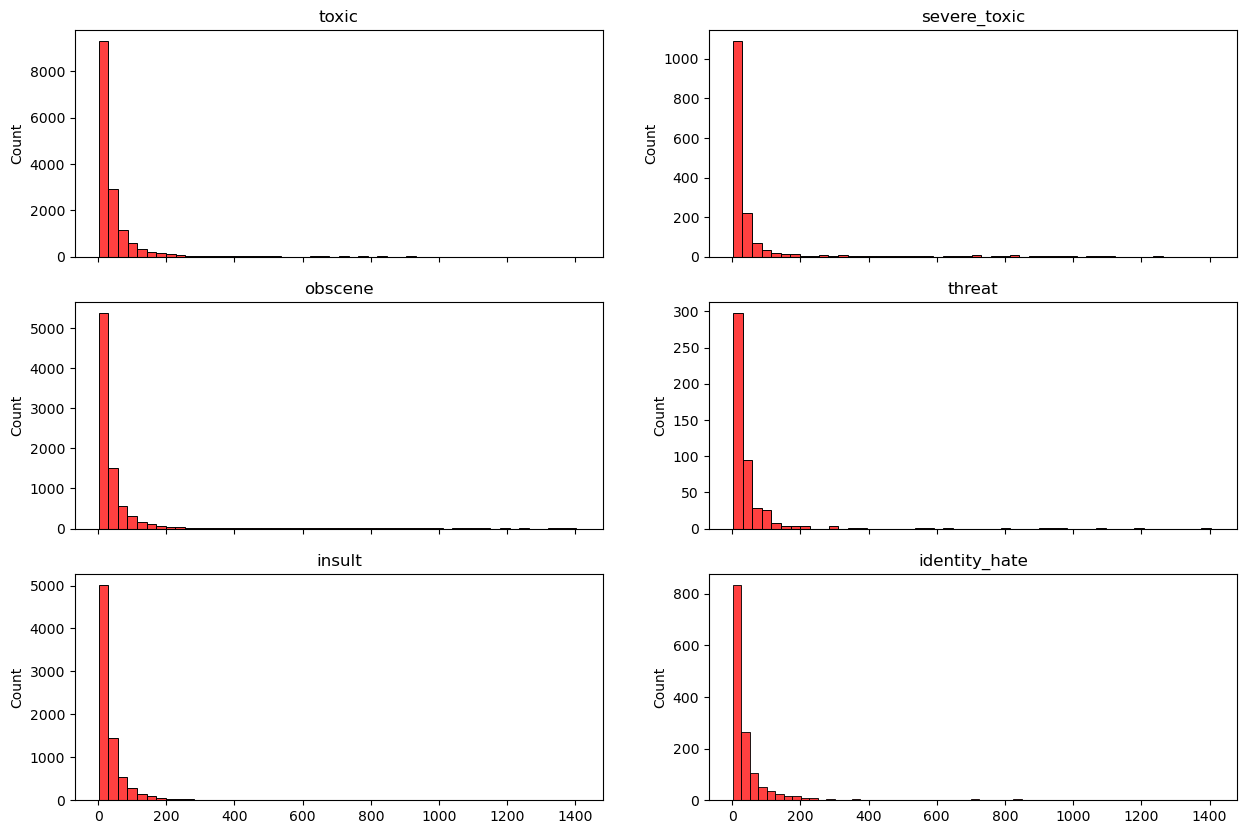

In [185]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10), sharex=True)
axes =ax.ravel()

for i in range(6):
    comments = train.loc[train[labels[i]] == 1, :]
    comment_len = [len(comment.split()) for comment in comments["comment_text"]]
    sns.histplot(comment_len, ax=axes[i], bins = 50, color="red")
    axes[i].title.set_text(labels[i])

## Wordclouds

Represent text data in which the size of each word indicates its frequency or importance.

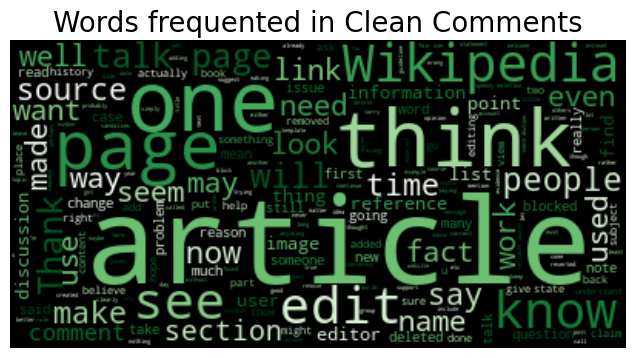

In [152]:
# clean words
subset=train[train.clean==True]
text = " ".join(i for i in subset.comment_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, colormap="Greens").generate(text)
plt.figure( figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.show()

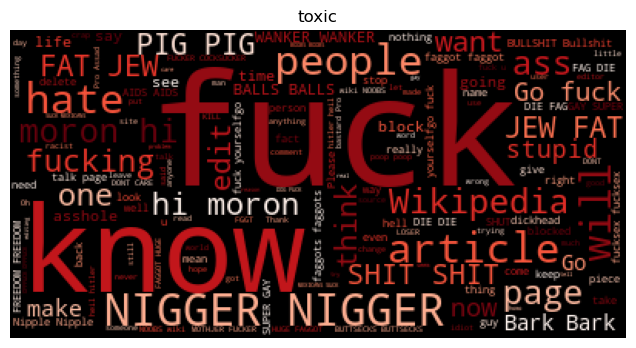

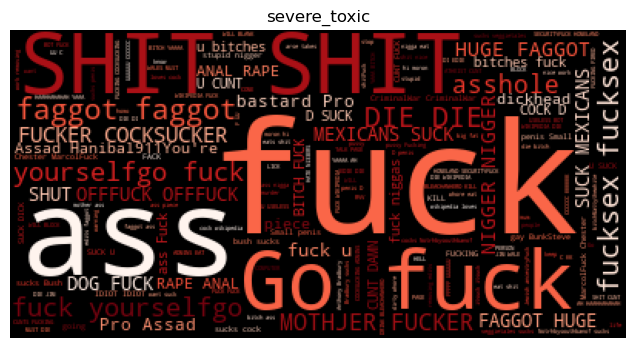

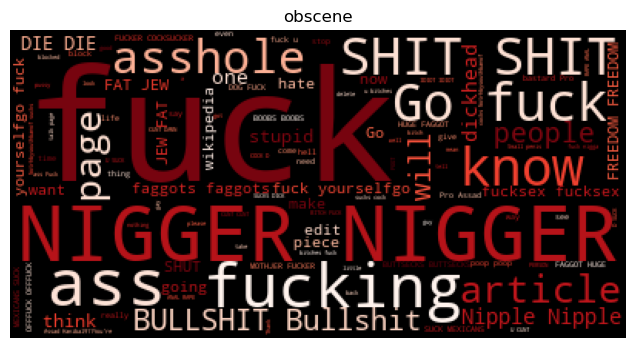

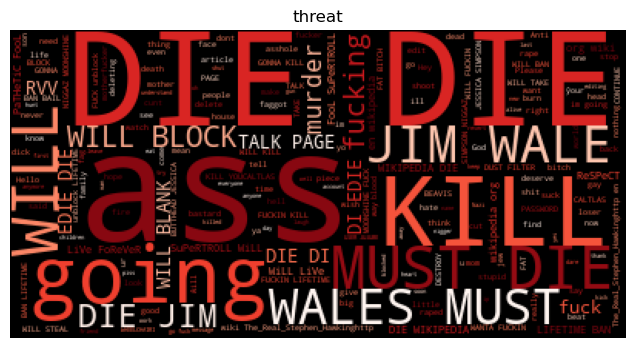

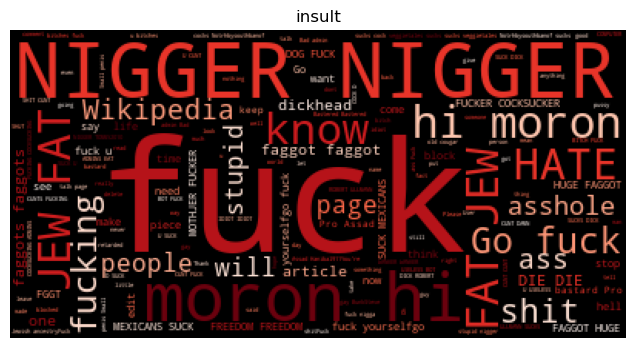

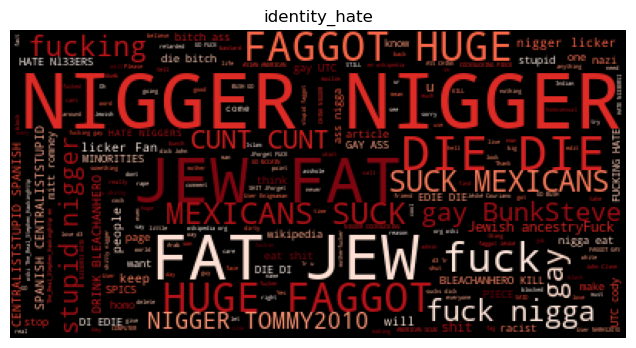

In [151]:
stopwords = set(STOPWORDS)

for l in labels:
    subset = train[train[l]==1]
    text = " ".join(i for i in subset.comment_text)
    wordcloud = WordCloud(
        stopwords=stopwords,
        max_words=200,
        max_font_size=100, 
        colormap="Reds"
        ).generate(text)

    fig = plt.figure(figsize=(8, 4))
    plt.title(l)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()